# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)
Y = Y.astype(int)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

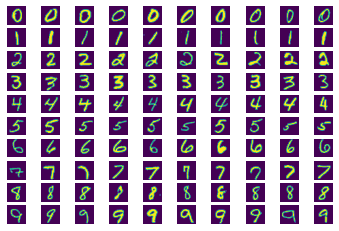

<Figure size 720x720 with 0 Axes>

In [3]:
def P1(num_examples=10):

    dimensions = (28,28)
    
    for num in range(0,10):
        for col in range (0, num_examples):
              
            idx = mini_train_labels == num
               
            Z = np.reshape(mini_train_data[idx][col,],(dimensions))
            ax = plt.subplot(10, 10, (num*10+col)+1)
            plt.axis('off')
            plt.imshow(Z)
        
    plt.figure(figsize=(10,10))

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
def P2(k_values):
    for k in k_values:
        model = KNeighborsClassifier(k)
        model.fit(mini_train_data, mini_train_labels)
        score = model.score(dev_data, dev_labels)
        
        if k==1:
            predictions = model.predict(dev_data)
            print("If k = 1")
            print(classification_report(dev_labels, predictions))
        
        print('If k =', k, ',', 'accuracy is: ', (score * 100.0))
        

k_values = [1, 3, 5, 7, 9]
P2(k_values)

If k = 1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

If k = 1 , accuracy is:  88.4
If k = 3 , accuracy is:  87.6
If k = 5 , accuracy is:  88.2
If k = 7 , accuracy is:  87.7
If k = 9 , accuracy is:  87.5


ANSWER: 8 is the most difficult to classify since it has the lowest f1-score.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
def P3(train_sizes, accuracies):
    
    for train_size in train_sizes:
        k = 1
        
        startTime = time.time()
        
        neighbor = KNeighborsClassifier(k)
        neighbor.fit(train_data[0:train_size], train_labels[0:train_size])

        predicted_labels = neighbor.predict(dev_data)
        correct, total = 0, 0
        for pred, label in zip(predicted_labels, dev_labels):
            if pred == label: correct += 1
            total += 1

        accuracy = (correct / total) * 1.0
        accuracies.append(accuracy)
     
      
        print ('Size is: ', train_size)
        endTime = time.time()
        print ('It took: ' , endTime - startTime, " seconds")
        print ('Accuracy is: ', accuracy)
        
        print(' ')

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Size is:  100
It took:  0.11396527290344238  seconds
Accuracy is:  0.702
 
Size is:  200
It took:  0.19569802284240723  seconds
Accuracy is:  0.791
 
Size is:  400
It took:  0.3783280849456787  seconds
Accuracy is:  0.811
 
Size is:  800
It took:  0.843472957611084  seconds
Accuracy is:  0.866
 
Size is:  1600
It took:  1.8515548706054688  seconds
Accuracy is:  0.905
 
Size is:  3200
It took:  4.3309149742126465  seconds
Accuracy is:  0.927
 
Size is:  6400
It took:  8.711151838302612  seconds
Accuracy is:  0.939
 
Size is:  12800
It took:  17.407109260559082  seconds
Accuracy is:  0.952
 
Size is:  25600
It took:  33.44529318809509  seconds
Accuracy is:  0.963
 


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.


----------------------Example code----------------------

prob_to_odds = lambda x: x / (1.0 - x)  # [0,1] -> [0, inf]

odds_to_prob = lambda x: x / (1.0 + x)  # [0, inf] -> [0, 1]

    
x_sizes = np.array(train_sizes)[:, np.newaxis]

x_logsizes = np.array(np.log(train_sizes))[:, np.newaxis]

y_oddsaccuracies = np.array(list(map(prob_to_odds, accuracies)))


In [6]:
def P4():

### STUDENT START ###
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
    accuracies = P3(train_sizes, [])
    accuracies = np.array(accuracies)
    
    model = LinearRegression()
    model.fit(train_sizes, accuracies)
    predicted_labels = model.predict(train_sizes)
    
### STUDENT END ###

P4()

Size is:  100
It took:  0.12501907348632812  seconds
Accuracy is:  0.702
 
Size is:  200
It took:  0.20015430450439453  seconds
Accuracy is:  0.791
 
Size is:  400
It took:  0.4103679656982422  seconds
Accuracy is:  0.811
 
Size is:  800
It took:  0.8878390789031982  seconds
Accuracy is:  0.866
 
Size is:  1600
It took:  2.1355841159820557  seconds
Accuracy is:  0.905
 
Size is:  3200
It took:  4.672987937927246  seconds
Accuracy is:  0.927
 
Size is:  6400
It took:  9.804991960525513  seconds
Accuracy is:  0.939
 
Size is:  12800
It took:  17.916316747665405  seconds
Accuracy is:  0.952
 
Size is:  25600
It took:  32.63320589065552  seconds
Accuracy is:  0.963
 


ValueError: Expected 2D array, got 1D array instead:
array=[  100   200   400   800  1600  3200  6400 12800 25600].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ANSWER: I couldn't solve question 4 more than what I wrote.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


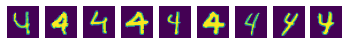

In [68]:
def P5():

    k = 1
    model = KNeighborsClassifier(k)
    model.fit(mini_train_data, mini_train_labels)
    
    predicted_labels = model.predict(dev_data)
    
    print(confusion_matrix(dev_labels, predicted_labels))
    incorrect_predictions = (predicted_labels != dev_labels)

            
    i, count = 0, 0
    while count < 9:
        if dev_labels[i] == 4 and predicted_labels[i] == 9:
            mat = np.reshape(dev_data[i,], (28,28))
            plt.subplot(1, 9, count+1)
            plt.imshow(mat)
            plt.axis('off')
            count += 1
        i += 1


P5()

ANSWER: 4's are being mixed up as 9's.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

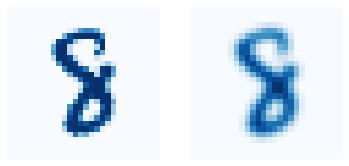

Model 1:
total: 1000  correct: 906  accuracy: 0.91
None
Model 2:
total: 1000  correct: 868  accuracy: 0.87
None
Model 3:
total: 1000  correct: 901  accuracy: 0.90
None


In [87]:
def P6():   
    def blur(data, weights):        
        blur_data = np.zeros(data.shape)
        for i in range(data.shape[0]):
            img = np.reshape(data[i], (28,28))
            blur_img = np.zeros((28, 28))
            for j in range(1, 27):
                for k in range(1, 27):
                    for l in range(-1, 2):
                        for m in range(-1, 2):
                            blur_img[j][k] += img[j+l][k+m] * weights[l+1][m+1]
            blur_data[i] = np.reshape(blur_img, (1, 784))
        return blur_data        
    
    def acc(train_set, train_set_labels, test_set, test_set_labels):
        clf = KNeighborsClassifier(n_neighbors=1)
        clf.fit(train_set, train_set_labels) 
        preds = clf.predict(test_set)
        correct, total = 0, 0
        for pred, label in zip(preds, test_set_labels):
            if pred == label: correct += 1
            total += 1
        print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))       
    
    total_weight = 0
    weights = np.zeros((3, 3))
    for i in range (-1, 2):
        for j in range (-1, 2):
            weights[i+1][j+1] = (1/(2 * np.pi * 1**2))*np.exp(-1 * (i**2 + j**2)/(2 * 1**2))
            total_weight += weights[i+1][j+1]

    for i in range (0, 3):
        for j in range(0, 3):
            weights[i][j] = weights[i][j]/total_weight
    
    mini_train_data_blur = blur(mini_train_data, weights)
    dev_data_blur = blur(dev_data, weights)
    
   
    img_1 = np.reshape(dev_data[0,], (28,28))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.imshow(img_1, cmap = 'Blues')
    
    img_2 = np.reshape(dev_data_blur[0,], (28,28))
    plt.subplot(1, 2, 2)
    plt.axis('off') 
    plt.imshow(img_2, cmap = 'Blues')  
    plt.show()    
        
    print ("Model 1:")
    print (acc(mini_train_data_blur, mini_train_labels, dev_data, dev_labels))
    print ("Model 2:")
    print (acc(mini_train_data, mini_train_labels, dev_data_blur, dev_labels))
    print ("Model 3:")
    print (acc(mini_train_data_blur, mini_train_labels, dev_data_blur, dev_labels))

P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [99]:
def P7(train_set, train_labels, test_set, test_labels):
    
    bernoulli_model = BernoulliNB(alpha= 1, binarize= 0.5)
    
    bernoulli_model.fit(train_set, train_labels)
    print ("Binomial NB:")
    print (bernoulli_model.score(test_set, test_labels))
    
   
    multinomial_thresholds = [0.2, 0.9]
    multinomial_train_set = multi_data(train_set, multinomial_thresholds)
    multinomial_test_set = multi_data(test_set, multinomial_thresholds)
    
    
    multinomial_model = MultinomialNB(alpha= 1)
    multinomial_model.fit(multinomial_train_set, train_labels)
    print ("Multinomial NB:")
    print (multinomial_model.score(multinomial_test_set, test_labels))

P7(mini_train_data, mini_train_labels, dev_data, dev_labels)
    
def multi_data(data, multinomial_thresholds):
   
    multi_data = np.zeros(data.shape)
    for index, digit in enumerate(data):
        multi_data[index][digit < multinomial_thresholds[0]] = 0
        multi_data[index][np.all([digit >= multinomial_thresholds[0], digit < multinomial_thresholds[1]], axis=0)] = 1
        multi_data[index][digit >= multinomial_thresholds[1]] = 2
    return multi_data

Binomial NB:
0.819
Multinomial NB:
0.815


ANSWER: Multinomial NB has slightly worse accuracy (81.9%) than the Binomial NB (81.5%). So, multinomial doesn't improve the results, binomial works better with the dev set. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [136]:
def P8(alphas):

    gscv = GridSearchCV(BernoulliNB(binarize=0.5), alphas)
    gscv.fit(mini_train_data, mini_train_labels)
    
    
    for i in alphas['alpha']:
        model = BernoulliNB(alpha=i, binarize=0.05)
        model.fit(mini_train_data, mini_train_labels)
        print("Alpha:")
        print(i)
        print("Accuracy:")
        print(model.score(dev_data, dev_labels))
        print("")
    
    return gscv


alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

Alpha:
1e-10
Accuracy:
0.814

Alpha:
0.0001
Accuracy:
0.823

Alpha:
0.001
Accuracy:
0.825

Alpha:
0.01
Accuracy:
0.829

Alpha:
0.1
Accuracy:
0.822

Alpha:
0.5
Accuracy:
0.813

Alpha:
1.0
Accuracy:
0.809

Alpha:
2.0
Accuracy:
0.805

Alpha:
10.0
Accuracy:
0.775


Best alpha =  {'alpha': 0.001}


ANSWER: Best value for alpha is 0.001. When the alpha is at 0.0001 the accuracy goes down to 82.3%, and the accuracy between the best alpha (0.001) and 0.0001 is very minimal. I expected it, and I think it is because there was no smoothing.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [117]:
def P9(): 

    model = GaussianNB()
    
    model.fit(mini_train_data, mini_train_labels)
    print ("Accuracy of dev data, Before fix in Percentage:")
    print ((model.score(dev_data, dev_labels)*100.0))
    
    mini_train_data_transformed = (mini_train_data + np.random.uniform(size = mini_train_data.shape))
    dev_data_transformed = (dev_data + np.random.uniform(size = dev_data.shape))
    model_transformed = GaussianNB()
    model_transformed.fit(mini_train_data_transformed, mini_train_labels)
    print ("Accuracy: Adjusted Gaussian Native Bayes in Percentage:")
    print ((model_transformed.score(dev_data_transformed, dev_labels)*100.0))
    
    print ("theta:") 
    print (str(model.theta_))
    print ("sigma:") 
    print (str(model.sigma_))

P9()

Accuracy of dev data, Before fix in Percentage:
59.3
Accuracy: Adjusted Gaussian Native Bayes in Percentage:
81.10000000000001
theta:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
sigma:
[[2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 ...
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]]


ANSWER: Adding white noise to the data, increases the accuracy, as the initial accuracy of dev data was 59.3%, and after addding noise and shaping the data helps to increase the accuracy to 81.1%.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

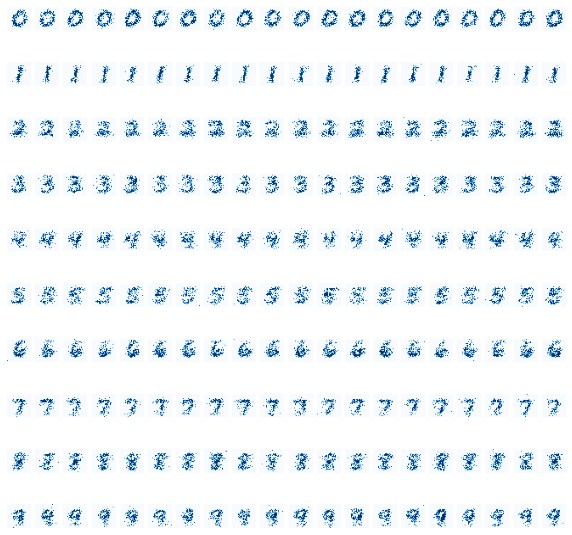

In [66]:
def P10(num_examples):
    
    threshold = 0.5
    clf = BernoulliNB(alpha = 0.1, binarize = threshold)
    clf.fit(mini_train_data, mini_train_labels)
    
    fig = plt.figure(figsize=(10, 10))
    for i in range(num_examples):
        for j in range(10):
            random_array = np.random.rand(784)
            mat = np.reshape([np.exp(clf.feature_log_prob_)[j] > random_array], (28,28))
            plt.subplot(10, num_examples, j * num_examples + i + 1)
            plt.axis('off')
            plt.imshow(mat, cmap = 'Blues')
        
P10(20)

ANSWER: These are the averages of the training data, and they contain some noise.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [119]:
def P11(buckets, correct, total):
    
    model = BernoulliNB(alpha=0.0001, binarize=0.1)
    model.fit(mini_train_data, mini_train_labels)
    
    predicted_class = model.predict(dev_data)
    predicted_probs = model.predict_proba(dev_data)
    
    for i, prediction in enumerate(predicted_class):
        max_probs = max(predicted_probs[i])
        bucket = (max_probs >= buckets)

        correct_pred = [0 for i in range(len(bucket))]
    
        if(prediction == dev_labels[i]):
            correct_pred = bucket
        correct += correct_pred
        total += bucket
    return (correct, total)      


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

correct, total = P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))                                                                           
                                                                                                              

p(pred) is 0.0000000000000 to 0.5000000000000    total = 1000    accuracy = 0.826
p(pred) is 0.5000000000000 to 0.9000000000000    total = 960    accuracy = 0.840
p(pred) is 0.9000000000000 to 0.9990000000000    total = 908    accuracy = 0.869
p(pred) is 0.9990000000000 to 0.9999900000000    total = 846    accuracy = 0.891
p(pred) is 0.9999900000000 to 0.9999999000000    total = 788    accuracy = 0.915
p(pred) is 0.9999999000000 to 0.9999999990000    total = 740    accuracy = 0.924
p(pred) is 0.9999999990000 to 0.9999999999900    total = 698    accuracy = 0.934
p(pred) is 0.9999999999900 to 0.9999999999999    total = 651    accuracy = 0.945
p(pred) is 0.9999999999999 to 1.0000000000000    total = 627    accuracy = 0.951


ANSWER: When predicted probability gets closer to 1, the accuracy increases, so it is strongly calibrated.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()